<a href="https://colab.research.google.com/github/FirmanSiburian/CO2Emission/blob/main/GBM_Fix_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor as GBR
from sklearn.metrics import root_mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import LabelEncoder

# Import train_test_split
from sklearn.model_selection import train_test_split

# Import Grid Search
from sklearn.model_selection import GridSearchCV

sns.set()

In [24]:
# Load dataset
file_url = 'https://raw.githubusercontent.com/FirmanSiburian/CO2Emission/refs/heads/main/CanadaCarEmissions.xlsx'
df = pd.read_excel(file_url)

print(df.head())

   MODEL YEAR   MAKE MODEL(# = high output engine) VEHICLE CLASS  \
0         NaN    NaN                           NaN           NaN   
1      1995.0  ACURA                       INTEGRA    SUBCOMPACT   
2      1995.0  ACURA                       INTEGRA    SUBCOMPACT   
3      1995.0  ACURA                  INTEGRA GS-R    SUBCOMPACT   
4      1995.0  ACURA                        LEGEND       COMPACT   

   ENGINE SIZE (L)  CYLINDERS TRANSMISSION FUEL TYPE  \
0              NaN        NaN          NaN       NaN   
1              1.8        4.0           A4         X   
2              1.8        4.0           M5         X   
3              1.8        4.0           M5         Z   
4              3.2        6.0           A4         Z   

   FUEL CONSUMPTION CITY (L/100)  FUEL CONSUMPTION HWY (L/100)  \
0                            NaN                           NaN   
1                           11.6                           8.3   
2                           11.0                        

In [25]:
# Summary Statistics for Numerical data:
df.describe()

,MODEL YEAR,ENGINE SIZE (L),CYLINDERS,FUEL CONSUMPTION CITY (L/100),FUEL CONSUMPTION HWY (L/100),COMB (L/100 km),COMB (mpg),CO2 EMISSIONS (g/km),CO2 Rating,Smog Rating
count,26075.000000,26075.000000,26075.000000,26075.000000,26075.000000,26075.000000,26075.000000,26075.000000,7171.000000,6061.000000
mean,2009.576031,3.355448,5.844257,13.036272,9.162991,11.294082,26.784314,256.679003,4.659880,4.674311
std,7.725814,1.342021,1.796767,3.560212,2.398400,2.997495,7.306594,63.062087,1.638001,1.791209
min,1995.000000,0.800000,2.000000,3.500000,3.200000,3.600000,11.000000,83.000000,1.000000,1.000000
25%,2004.000000,2.300000,4.000000,10.600000,7.500000,9.200000,22.000000,212.500000,4.000000,3.000000
50%,2010.000000,3.000000,6.000000,12.600000,8.700000,10.800000,26.000000,248.000000,5.000000,5.000000
75%,2016.000000,4.200000,8.000000,15.100000,10.500000,13.000000,31.000000,297.000000,6.000000,6.000000
max,2022.000000,8.400000,16.000000,30.600000,20.900000,26.100000,78.000000,608.000000,10.000000,8.000000


In [26]:
# use isnull().sum() to check for missing values
df.isnull().sum()

,0
MODEL YEAR,1
MAKE,1
MODEL(# = high output engine),1
VEHICLE CLASS,1
ENGINE SIZE (L),1
CYLINDERS,1
TRANSMISSION,1
FUEL TYPE,1
FUEL CONSUMPTION CITY (L/100),1
FUEL CONSUMPTION HWY (L/100),1


In [27]:
# Remove All the rows that contain a Missing Value

a=df.dropna()
a.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6061 entries, 20015 to 26075
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   MODEL YEAR                     6061 non-null   float64
 1   MAKE                           6061 non-null   object 
 2   MODEL(# = high output engine)  6061 non-null   object 
 3   VEHICLE CLASS                  6061 non-null   object 
 4   ENGINE SIZE (L)                6061 non-null   float64
 5   CYLINDERS                      6061 non-null   float64
 6   TRANSMISSION                   6061 non-null   object 
 7   FUEL TYPE                      6061 non-null   object 
 8   FUEL CONSUMPTION CITY (L/100)  6061 non-null   float64
 9   FUEL CONSUMPTION HWY (L/100)   6061 non-null   float64
 10  COMB (L/100 km)                6061 non-null   float64
 11  COMB (mpg)                     6061 non-null   float64
 12  CO2 EMISSIONS (g/km)           6061 non-null   f

In [28]:
# Check any missing value after removing the missing values

missing_a =a.isnull().sum(axis=0).reset_index()
missing_a.columns = ['Column Name', 'Missing Values Count']
missing_a['Filling Factor (%)']=(a.shape[0]-missing_a['Missing Values Count'])/a.shape[0]*100
missing_a.sort_values('Filling Factor (%)').reset_index(drop = True)

,Column Name,Missing Values Count,Filling Factor (%)
0,MODEL YEAR,0,100.0
1,MAKE,0,100.0
2,MODEL(# = high output engine),0,100.0
3,VEHICLE CLASS,0,100.0
4,ENGINE SIZE (L),0,100.0
5,CYLINDERS,0,100.0
6,TRANSMISSION,0,100.0
7,FUEL TYPE,0,100.0
8,FUEL CONSUMPTION CITY (L/100),0,100.0
9,FUEL CONSUMPTION HWY (L/100),0,100.0


In [29]:
#Filter
filtered_df = df[df['FUEL TYPE'].isin(['E', 'D', 'Z'])].copy()
filtered_df = pd.get_dummies(filtered_df, columns=['FUEL TYPE'], drop_first=False)

In [30]:
filtered_df

,MODEL YEAR,MAKE,MODEL(# = high output engine),VEHICLE CLASS,ENGINE SIZE (L),CYLINDERS,TRANSMISSION,FUEL CONSUMPTION CITY (L/100),FUEL CONSUMPTION HWY (L/100),COMB (L/100 km),COMB (mpg),CO2 EMISSIONS (g/km),CO2 Rating,Smog Rating,FUEL TYPE_D,FUEL TYPE_E,FUEL TYPE_Z
3,1995.0,ACURA,INTEGRA GS-R,SUBCOMPACT,1.8,4.0,M5,10.8,8.3,9.7,29.0,223.0,NaN,NaN,False,False,True
4,1995.0,ACURA,LEGEND,COMPACT,3.2,6.0,A4,14.2,10.5,12.5,23.0,288.0,NaN,NaN,False,False,True
5,1995.0,ACURA,LEGEND COUPE,COMPACT,3.2,6.0,A4,14.6,11.0,13.0,22.0,299.0,NaN,NaN,False,False,True
6,1995.0,ACURA,LEGEND COUPE,COMPACT,3.2,6.0,M6,15.0,9.9,12.7,22.0,292.0,NaN,NaN,False,False,True
7,1995.0,ACURA,NSX,TWO-SEATER,3.0,6.0,A4,15.1,10.9,13.2,21.0,304.0,NaN,NaN,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26071,2022.0,Volvo,XC40 T5 AWD,SUV: Small,2.0,4.0,AS8,10.7,7.7,9.4,30.0,219.0,5.0,5.0,False,False,True
26072,2022.0,Volvo,XC60 B5 AWD,SUV: Small,2.0,4.0,AS8,10.5,8.1,9.4,30.0,219.0,5.0,5.0,False,False,True
26073,2022.0,Volvo,XC60 B6 AWD,SUV: Small,2.0,4.0,AS8,11.0,8.7,9.9,29.0,232.0,5.0,7.0,False,False,True
26074,2022.0,Volvo,XC90 T5 AWD,SUV: Standard,2.0,4.0,AS8,11.5,8.4,10.1,28.0,236.0,5.0,5.0,False,False,True


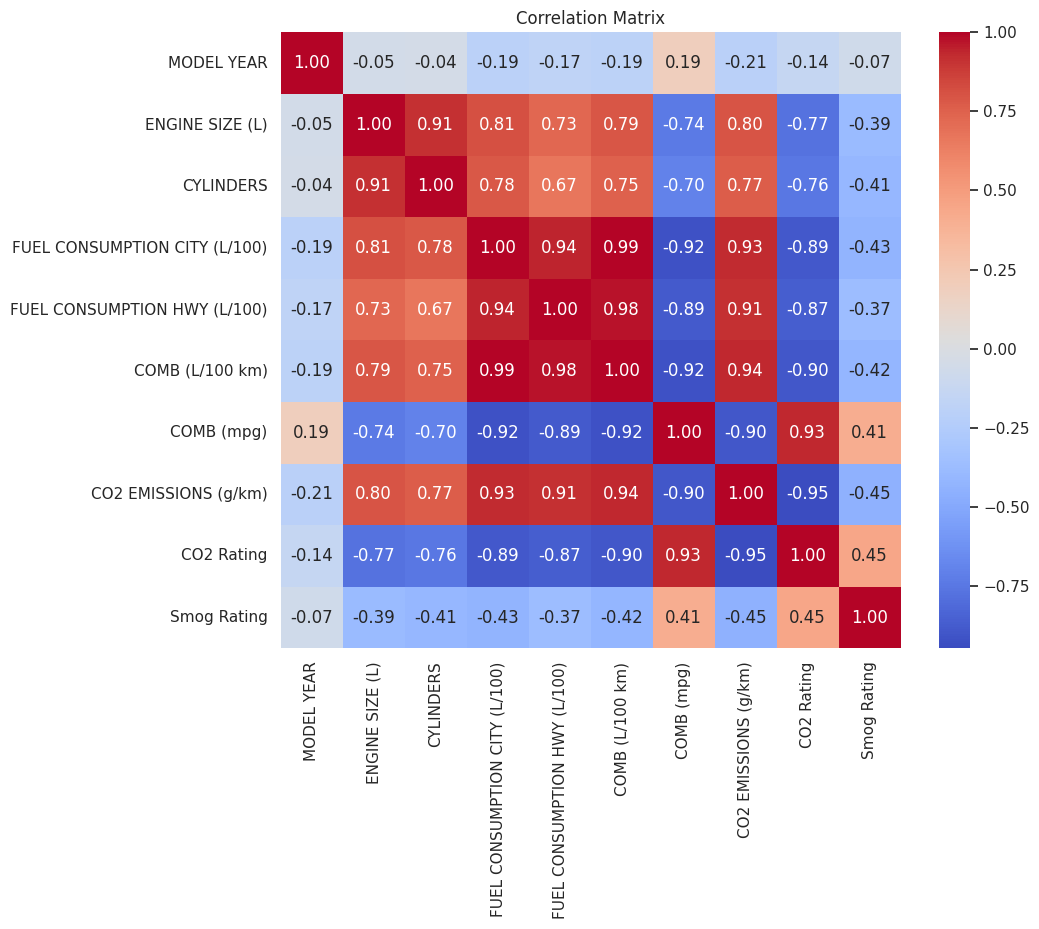

In [31]:
# Display correlation matrix (only numeric columns)
numeric_df = df.select_dtypes(include=['number'])
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

In [34]:
#Define Variable
X = filtered_df[['COMB (L/100 km)', 'FUEL CONSUMPTION CITY (L/100)',
                 'FUEL CONSUMPTION HWY (L/100)', 'FUEL TYPE_E', 'FUEL TYPE_D', 'CYLINDERS', 'ENGINE SIZE (L)', 'FUEL TYPE_Z' ]]
Y = filtered_df['CO2 EMISSIONS (g/km)']

# Train-Test Split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Initialize Gradient Boosting Regressor
# Use the alias GBR instead of GradientBoostingRegressor
gbm = GBR()

#Hyperparameter tuning using GridSearchCV
parameter_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'subsample': [0.8, 1.0, 0.9]
}

#Grid search
grid_search = GridSearchCV(estimator=gbm,
                           param_grid=parameter_grid,
                           cv=5,
                           n_jobs=-1,
                           scoring='neg_root_mean_squared_error')
grid_search.fit(X_train, Y_train)

#Best Parameter
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

#Best Model
best_model = grid_search.best_estimator_

Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 7, 'min_samples_split': 5, 'n_estimators': 300, 'subsample': 0.8}


In [35]:
# Evaluate
test_rmse = root_mean_squared_error(Y_test, best_model.predict(X_test))
test_r2 = r2_score(Y_test, best_model.predict(X_test))  # R-squared for test set
test_mae = mean_absolute_error(Y_test, best_model.predict(X_test))  # MAE for test set

print(f"Best Parameters: {grid_search.best_params_}")
print(f"Test RMSE: {test_rmse}")
print(f"Test R-squared: {test_r2}")
print(f"Test MAE: {test_mae}")

# cross-validation results
cv_results = grid_search.cv_results_

#Extract R-squared and MAE from cv_results_
r2_scores = cv_results['mean_test_score']  # Get the mean test scores (which are negative RMSE in this case)
r2_scores = -r2_scores # Convert it to positive to reflect the error
mae_scores = cv_results['mean_test_score']  # This line needs to be updated, if you want to compute mean absolute error. If you want R-squared values use grid_search.score(X_test, Y_test)

results_df = pd.DataFrame({
    'Parameters': [str(p) for p in cv_results['params']],
    'RMSE': -cv_results['mean_test_score'],
    'R-squared': r2_scores,
    'MAE': mae_scores
})


Best Parameters: {'learning_rate': 0.1, 'max_depth': 7, 'min_samples_split': 5, 'n_estimators': 300, 'subsample': 0.8}
Test RMSE: 2.026969372577697
Test R-squared: 0.9987960341715872
Test MAE: 1.0572704179381556
